# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Откроем данные и изучим их

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.dummy import DummyRegressor

- gold_recovery_train_new.csv — обучающая выборка;
- gold_recovery_test_new.csv — тестовая выборка;
- gold_recovery_full_new.csv — исходные данные.

In [ ]:
data = pd.read_csv('/datasets/gold_recovery_full_new.csv')
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [ ]:
data.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [ ]:
data.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
train_data.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [ ]:
train_data.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
test_data.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [ ]:
test_data.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [ ]:
test_data.duplicated().sum()

0

**Вывод**

В данных отсутсвют явные дубликаты, однако были найдены пропуски, особенно в обучающей выборке. Можно предположить, что был неправильно заполнены данные или были пропуски на тапах. Полученная информация поможет нам в дальнейшем с предобработкой данных.

### Проверим, что эффективность обогащения рассчитана правильно

- recovery = ((C(F-T))/(FC-T))*100%, где:
- С - доля золота концентрате после фильтрации/очитски (rougher.output.concentrate_au)
- F - доля золота в сырье/концентрате до флотации/очистки (rougher.input.feed_au)
- T - доля золота в отвальных хвостах после фильтрации/очистки (rougher.output.tail_au)
- Значение нужного целевого признака - rougher.output.recovery

In [ ]:
C = train_data['rougher.output.concentrate_au']
F = train_data['rougher.input.feed_au']
T = train_data['rougher.output.tail_au']

In [ ]:
recovery = ((C*(F-T))/(F*(C-T)))*100

In [ ]:
if recovery.mean() == train_data['rougher.output.recovery'].mean():
    print("Эффективность обогащения рассчитана правильно:", recovery.mean())
else:
    print("Эффективность обогащения рассчитана неверно")

Эффективность обогащения рассчитана правильно: 82.70450164550293


**Найдем MAE между расчётами и значением признака**

In [ ]:
print(mean_absolute_error(train_data['rougher.output.recovery'],recovery))

9.73512347450521e-15


**Вывод**

Как мы можеи увидеть, значение MAE очень маленькое, что означает - эффективность обогащения рассчитана правильно.

### Проанализируем признаки, недоступные в тестовой выборке

Используем метод difference(), который возвращает установленную разницу двух наборов.

In [ ]:
train = train_data.columns
test = test_data.columns

In [ ]:
print(train.difference(test))

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

**Вывод**

Таким образом, мы обнаружены признаки, отсутсвующие в тестовой выборке. Это признаки, относящиеся к вторичным стадиям обогащения, параметры продуктов, расчетные характеристики.

### Проведем предобработку данных

Удалим данные, которые отсутсвуют в тестовой выборке

In [ ]:
train_data = train_data[test_data.columns]

Заменим пропуски в данных

In [ ]:
train_data = train_data.fillna(method='bfill')
test_data = test_data.fillna(method='bfill')
data = data.fillna(method='bfill')

Проверим, остались ли пропуски

In [ ]:
test_data.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [ ]:
train_data.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [ ]:
data.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

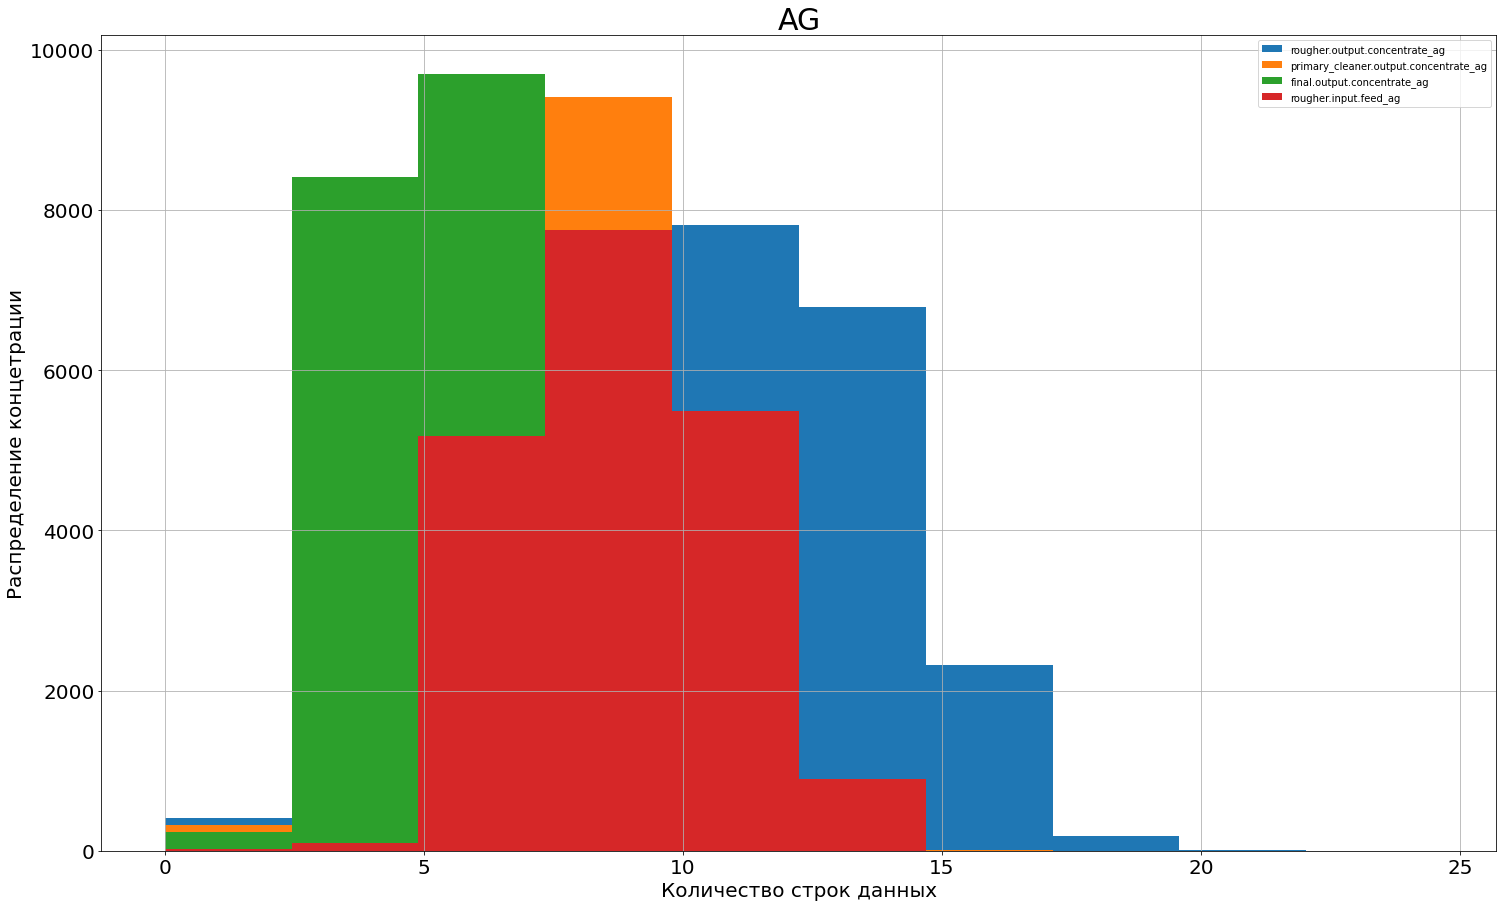

In [ ]:
data.plot(y=['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag','rougher.input.feed_ag'], kind='hist',figsize=(25,15),fontsize=20)
plt.grid(True)
plt.title('AG', fontsize=30)
plt.xlabel('Количество строк данных',fontsize=20)
plt.ylabel('Pаспределение концетрации',fontsize=20)
plt.show()

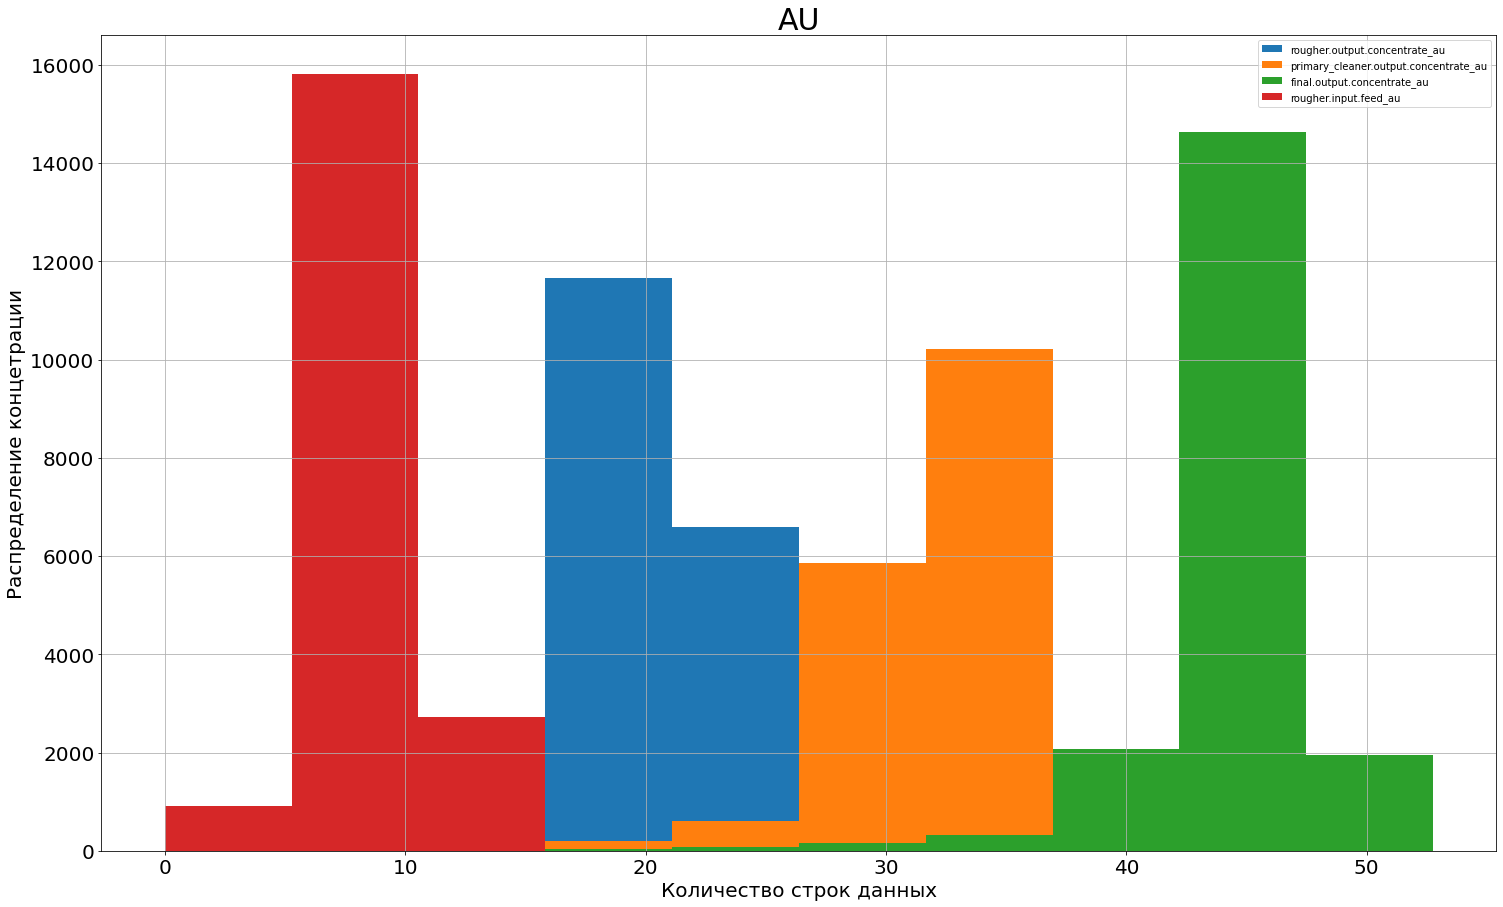

In [ ]:
data.plot(y=['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au','final.output.concentrate_au','rougher.input.feed_au'], kind='hist',figsize=(25,15),fontsize=20)
plt.grid(True)
plt.title('AU', fontsize=30)
plt.xlabel('Количество строк данных',fontsize=20)
plt.ylabel('Pаспределение концетрации',fontsize=20)
plt.show()

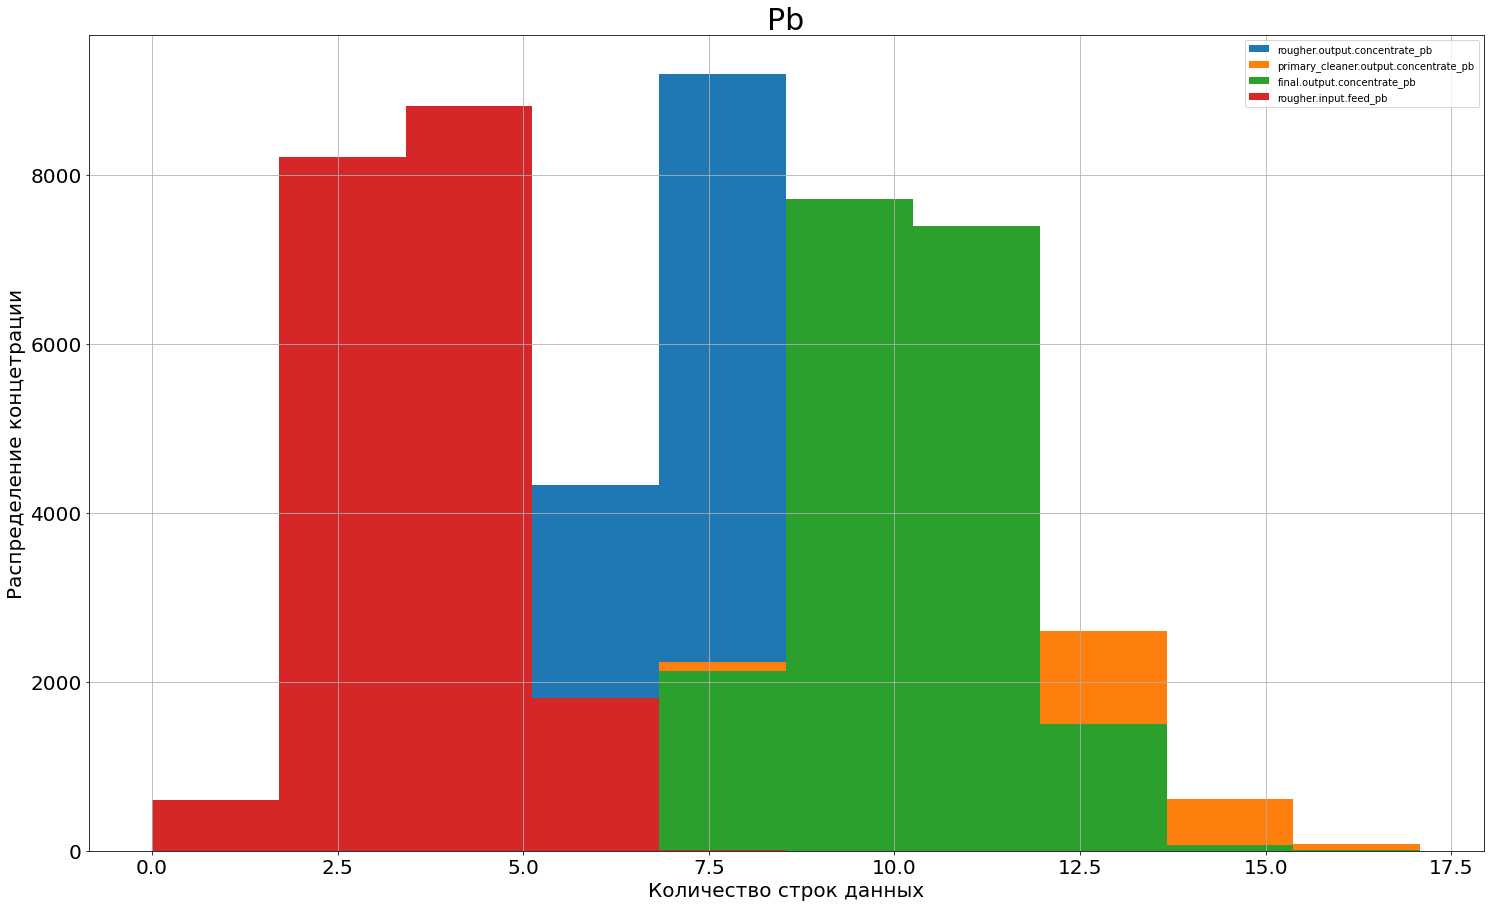

In [ ]:
data.plot(y=['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb','rougher.input.feed_pb'], kind='hist',figsize=(25,15),fontsize=20)
plt.grid(True)
plt.title('Pb', fontsize=30)
plt.xlabel('Количество строк данных',fontsize=20)
plt.ylabel('Pаспределение концетрации',fontsize=20)
plt.show()

**Вывод**

Концентрация свинца и серебра находится на всех этапах практически на одном уровне, в то время как концентрация золота возрастает на финальной отчистке.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной

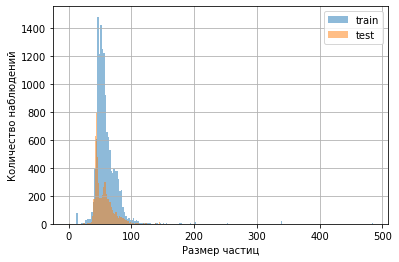

In [ ]:
train_data['rougher.input.feed_size'].hist(bins=200, alpha=0.5, label='train')
test_data['rougher.input.feed_size'].hist(bins=200, alpha=0.5, label='test')
plt.xlabel('Размер частиц')
plt.ylabel('Количество наблюдений')
plt.legend()

In [ ]:
train_data['rougher.input.feed_size'].describe()

count    14149.000000
mean        59.955950
std         23.286534
min          9.659576
25%         48.920770
50%         55.301596
75%         65.941463
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [ ]:
test_data['rougher.input.feed_size'].describe()

count    5290.000000
mean       55.952917
std        19.080412
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

**Вывод**

Исходя из анализа, можно сделать вывод, что распределения не имееют значительных различий.

### Исследуем  суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

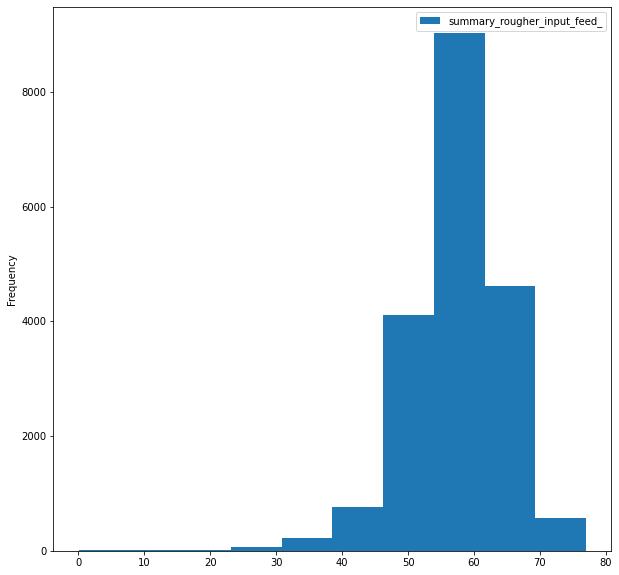

In [ ]:
data['summary_rougher_input_feed_']= data[['rougher.input.feed_ag','rougher.input.feed_au','rougher.input.feed_pb','rougher.input.feed_sol']].sum(axis=1)
data.plot(y = 'summary_rougher_input_feed_', kind='hist', figsize=(10,10))
plt.show()

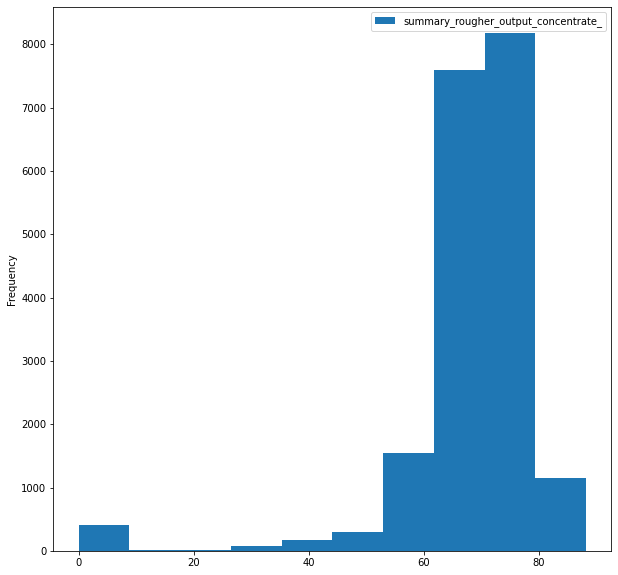

In [ ]:
data['summary_rougher_output_concentrate_']= data[['rougher.output.concentrate_ag','rougher.output.concentrate_au','rougher.output.concentrate_pb','rougher.output.concentrate_sol']].sum(axis=1)
data.plot(y = 'summary_rougher_output_concentrate_', kind='hist', figsize=(10,10))
plt.show()

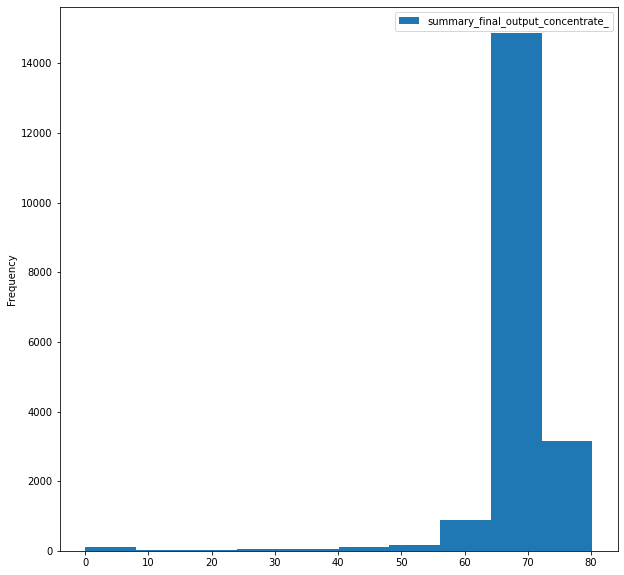

In [ ]:
data['summary_final_output_concentrate_']= data[['final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb','final.output.concentrate_sol']].sum(axis=1)
data.plot(y = 'summary_final_output_concentrate_', kind='hist', figsize=(10,10))
plt.show()

In [ ]:
data['summary_rougher_output_concentrate_'] = data['summary_rougher_output_concentrate_'].replace(0, np.nan)
data['summary_rougher_output_concentrate_'].dropna(inplace=True)

**Необходимо удалить значения, которые являются аномалией, поскольку на черновом концентрате достаточно большой нулевой столбец.**

In [ ]:
data['summary_rougher_output_concentrate_'] = data['summary_rougher_output_concentrate_'].replace(0, np.nan)
data['summary_rougher_output_concentrate_'].dropna(inplace=True)

## Модель

### Напишем функцию для вычисления итоговой sMAPE.

In [ ]:
def smape_total_func(target_rougher, prediction_rougher, target_final, prediction_final):
    smape_rough = 1 / len(target_rougher) * np.sum(2 * np.abs(target_rougher - prediction_rougher) / (np.abs(target_rougher) + np.abs(prediction_rougher))*100)
    smape_final = 1 / len(target_final) * np.sum(2 * np.abs(target_final - prediction_final) / (np.abs(target_final) + np.abs(prediction_final))*100)
    smape_total = (0.25 * smape_rough) + (0.75 * smape_final)
    return smape_total

In [ ]:
def smape_final_func(rougher, final):
    smape_final = 0.25 * rougher + 0.75 * final
    return smape_final

In [ ]:
def smape_func(target, prediction):
    smape = 1 / len(target) * np.sum(2 * np.abs(target - prediction) / (np.abs(target) + np.abs(prediction))*100)
    return smape

### Обучим разные модели и оценим их качество кросс-валидацией.

In [ ]:
test_data = test_data.merge(data[['rougher.output.recovery', 'final.output.recovery', 'date']], how = 'left', on= 'date')
train_data = train_data.merge(data[['rougher.output.recovery', 'final.output.recovery', 'date']], how = 'left', on= 'date')

In [ ]:
test_data.drop(['date'], axis = 1 , inplace=True)
train_data.drop(['date'], axis = 1 , inplace=True)

In [ ]:
features_train_rougher = train_data.filter(regex='^rougher',axis=1)
features_train_rougher = features_train_rougher.drop(['rougher.output.recovery'], axis=1)
target_train_rougher = train_data['rougher.output.recovery']
features_train_final = train_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_final = train_data['final.output.recovery']

In [ ]:
features_test_rougher = test_data.filter(regex='^rougher',axis=1)
features_test_rougher = features_test_rougher.drop(['rougher.output.recovery'], axis=1)
target_test_rougher = test_data['rougher.output.recovery']
features_test_final = test_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_final = test_data['final.output.recovery']

**Линейная регрессия**

In [ ]:
model = LinearRegression()
scorer = make_scorer(smape_func, greater_is_better=False)
rougher_lin = cross_val_score(model, features_train_rougher, target_train_rougher, scoring=scorer, cv=5)
final_lin =  cross_val_score(model, features_train_final, target_train_final, scoring=scorer, cv=5)
print('SMAPE:', smape_final_func(rougher_lin, final_lin).mean())

SMAPE: -12.087260472858052


**Дерево решений**

In [ ]:
for depth in range(1, 12):
    model = DecisionTreeRegressor(random_state=12345, max_depth = depth)
    scorer = make_scorer(smape_func, greater_is_better=False)
    rougher_tree = cross_val_score(model, features_train_rougher, target_train_rougher, scoring=scorer, cv=5)
    final_tree = cross_val_score(model, features_train_final, target_train_final, scoring=scorer, cv=5)
    print('Глубина:',depth)
    print('SMAPE:',smape_final_func(rougher_tree, final_tree).mean())
print()

Глубина: 1
SMAPE: -11.398605696208332
Глубина: 2
SMAPE: -11.403011957774389
Глубина: 3
SMAPE: -11.216765520639076
Глубина: 4
SMAPE: -11.788904359134524
Глубина: 5
SMAPE: -11.775061129140564
Глубина: 6
SMAPE: -12.623266334210076
Глубина: 7
SMAPE: -14.678428519798725
Глубина: 8
SMAPE: -15.569285437120438
Глубина: 9
SMAPE: -17.560638989145485
Глубина: 10
SMAPE: -18.604460697360956
Глубина: 11
SMAPE: -18.44119086914546



**Вывод**

Таким образом, наилучшей моделью является дерево решений, поскольку минимальное значение равняется -11,216765520639076, а в линейной регрессии -12.087260472858052

**Выберием лучшую модель и проверяем её на тестовой выборке**

In [ ]:
model_rougher = DecisionTreeRegressor(random_state=12345, max_depth = 3)
model_final = DecisionTreeRegressor(random_state=12345, max_depth = 3)
model_rougher.fit(features_train_rougher, target_train_rougher)
model_final.fit(features_train_final, target_train_final)
test_predictions_rougher = model_rougher.predict(features_test_rougher)
test_predictions_final = model_final.predict(features_test_final)
print('SMAPE:',smape_total_func(target_test_rougher, test_predictions_rougher, target_test_final, test_predictions_final).mean())

SMAPE: 9.397953978076298


In [ ]:
dummy_model_rougher = DummyRegressor(strategy="mean")
dummy_model_final = DummyRegressor(strategy="mean")
dummy_model_rougher.fit(features_train_rougher, target_train_rougher)
dummy_model_final.fit(features_train_final, target_train_final)
test_predictions_rougher = dummy_model_rougher.predict(features_test_rougher)
test_predictions_final = dummy_model_final.predict(features_test_final)

print('SMAPE:',smape_total_func(target_test_rougher, test_predictions_rougher, target_test_final, test_predictions_final).mean())

**Вывод**

Таким образом, нам удалось достичь параметра SMape меньше DummyRegressor и равняется 9.397953978076298